In [2]:
# These libraries are available in the Python 3 kernel
import pandas as pd
import numpy as np
from os.path import exists

# These libraries are not available in the Python 3 kernel but are in py-gordon_1_0_0
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Introduction

The simulations are being performed by a group at the University of Leeds. For each variant, a high-time and space-resolution, global simulation of a large number of climate variables is run. Then, for each aircraft tour, the simulated variable quantities coinciding with the tour route are collected are packaged in netCDF files which resemble the observational datasets.

There are 64 parameters on which the simulated data are set. From the 64-dimensional parameter space, 221 points are chosen to determine 221 different model variants. Here we peek at ten parameter values for the first ten variants in the ensemble.

In [31]:
# Obtain a comma-separated table of simulation ensemble members' parameter combinations
csv_table_metric = c3.SimulationModelParameters.fetch().objs.toJson()

# Save this table instead as a pandas dataframe (221 ensemble members x 64 parameters)
dfparams = pd.DataFrame(csv_table_metric)

# Peek at the dataframe with print(dfparams.head())

print(dfparams.head(10).iloc[:, 5 : 15])

   acure_bl_nuc  acure_ait_width  acure_cloud_ph  acure_carb_ff_ems  \
0      0.500000         0.650000        0.396000                1.0   
1      0.470000         0.500000        0.500000                1.0   
2      0.969888         0.083081        0.478474                1.0   
3      0.132847         0.445265        0.390414                1.0   
4      0.058261         0.630422        0.132292                1.0   
5      0.971227         0.209244        0.818772                1.0   
6      0.904936         0.894188        0.733200                1.0   
7      0.174272         0.101051        0.507135                1.0   
8      0.329976         0.399961        0.809334                1.0   
9      0.111914         0.927531        0.212178                1.0   

   acure_carb_ff_ems_eur  acure_carb_ff_ems_nam  acure_carb_ff_ems_chi  \
0               0.500000               0.500000               0.500000   
1               0.530000               0.470000               0.530000

# Summary of ensemble members

The names of all the 64 parameters are listed in the cell below. Some are identifiers (i.e. 'type' through 'ensemble') but most are descriptions of aerosols of various kinds. Some inferred keywords are as follows:

'carb' : carbon
'bb' : biomass burning
'ems' : emissions
'ff' : fossil fuels
'anth' : anthropological

In [44]:
print(dfparams.columns.values)

['type' 'id' 'meta' 'version' 'ensemble' 'acure_bl_nuc' 'acure_ait_width'
 'acure_cloud_ph' 'acure_carb_ff_ems' 'acure_carb_ff_ems_eur'
 'acure_carb_ff_ems_nam' 'acure_carb_ff_ems_chi' 'acure_carb_ff_ems_asi'
 'acure_carb_ff_ems_mar' 'acure_carb_ff_ems_r' 'acure_carb_bb_ems'
 'acure_carb_bb_ems_sam' 'acure_carb_bb_ems_naf' 'acure_carb_bb_ems_saf'
 'acure_carb_bb_ems_bnh' 'acure_carb_bb_ems_rnh' 'acure_carb_bb_ems_rsh'
 'acure_carb_res_ems' 'acure_carb_res_ems_chi' 'acure_carb_res_ems_asi'
 'acure_carb_res_ems_afr' 'acure_carb_res_ems_lat' 'acure_carb_res_ems_r'
 'acure_carb_ff_diam' 'acure_carb_bb_diam' 'acure_carb_res_diam'
 'acure_prim_so4_diam' 'acure_sea_spray' 'acure_anth_so2'
 'acure_anth_so2_chi' 'acure_anth_so2_asi' 'acure_anth_so2_eur'
 'acure_anth_so2_nam' 'acure_anth_so2_r' 'acure_volc_so2' 'acure_bvoc_soa'
 'acure_dms' 'acure_prim_moc' 'acure_dry_dep_ait' 'acure_dry_dep_acc'
 'acure_dry_dep_so2' 'acure_kappa_oc' 'acure_sig_w' 'acure_rain_frac'
 'acure_cloud_ice_thresh' 'acu

In [20]:
# Define some metrics of interest

# mass_fraction_of_black_carbon_in_soluble_accumulation_mode_dry_aerosol_in_air
bcacc_metric = c3.SimpleMetric(id = "AverageMassBCacc_SimulationSample",
                               name = "AverageMassBCacc_SimulationSample",
                               description = "Calculates average of massBCacc for a given SimulationSample",
                               srcType = "SimulationSample",
                               path = "output",  # the timeseries is in the output field of SimSam
                               expression = "avg(avg(normalized.data.mass_BC_acc))")

# mass_fraction_of_particulate_organic_matter_in_soluble_accumulation_mode_dry_aerosol_in_air
ocacc_metric = c3.SimpleMetric(id = "AverageMassOCacc_SimulationSample",
                               name = "AverageMassOCacc_SimulationSample",
                               description = "Calculates average of massOCacc for a given SimulationSample",
                               srcType = "SimulationSample",
                               path = "output",  # the timeseries is in the output field of SimSam
                               expression = "avg(avg(normalized.data.mass_OC_acc))")

# mass_fraction_of_black_carbon_in_soluble_aitken_mode_dry_aerosol_in_air
bcait_metric = c3.SimpleMetric(id = "AverageMassBCait_SimulationSample",
                               name = "AverageMassBCait_SimulationSample",
                               description = "Calculates average of massBCait for a given SimulationSample",
                               srcType = "SimulationSample",
                               path = "output",  # the timeseries is in the output field of SimSam
                               expression = "avg(avg(normalized.data.mass_BC_Ait))")

# 
lon_metric = c3.SimpleMetric(id = "AverageLon_SimulationSample",
                             name = "AverageLon_SimulationSample",
                             description = "Calculates average of longitude for a given SimulationSample",
                             srcType = "SimulationSample",
                             path = "output",  # the timeseries is in the output field of SimSam
                             expression = "avg(avg(normalized.data.longitude))")

#
lat_metric = c3.SimpleMetric(id = "AverageLat_SimulationSample",
                             name = "AverageLat_SimulationSample",
                             description = "Calculates average of latitude for a given SimulationSample",
                             srcType = "SimulationSample",
                             path = "output",  # the timeseries is in the output field of SimSam
                             expression = "avg(avg(normalized.data.latitude))")

#
alt_metric = c3.SimpleMetric(id = "AverageAlt_SimulationSample",
                             name = "AverageAlt_SimulationSample",
                             description = "Calculates average of altitude for a given SimulationSample",
                             srcType = "SimulationSample",
                             path = "output",  # the timeseries is in the output field of SimSam
                             expression = "avg(avg(normalized.data.altitude))")

In [32]:
def evaluate_metrics(ensem_mem = 0,
                     start_time = "2017-08-18T00:00:00.000",
                     end_time = "2017-08-18T23:59:59.000",
                     time_int = "SECOND"):
    """
    For a particular model variant (i.e. ensemble member), access the simulated data for a selection of interesting
    variables within a given time frame and in a specified time interval
    
    Parameters
    
    ensem_mem : integer between 0 and 220
        Which model variant to sample
    start_time : datetime
        When to start evaluating the metric, e.g. "2017-08-18T00:00:00.000"
    end_time : datetime
        When to end evaluating the metric, e.g. "2017-08-18T23:59:59.000"
    time_int : string
        Time interval at which samples are desired, one of ['TEN_MINUTE', 'YEAR', 'DAY', 'MONTH', 'HOUR', 'MINUTE',
        'FIVE_MINUTE', 'HALF_HOUR', 'QUARTER_HOUR', 'SECOND']
    """

    # Specify the time frame and time interval of the data desired and the id of the sourceType (SimSam here)
    my_spec = c3.EvalMetricsSpec(
        # ID of ensemble member desired
        ids = ["EnsNo_1_SimNo_" + str(ensem_mem)],

        # The metric IDs desired from that ensemble member
        expressions = ["AverageMassBCacc_SimulationSample",
                       "AverageMassBCait_SimulationSample",
                       "AverageLon_SimulationSample",
                       "AverageLat_SimulationSample",
                       "AverageAlt_SimulationSample",
                       "AverageMassOCacc_SimulationSample"],

        # Time frame for sample (e.g. to specify when a flight occurred)
        start = start_time,
        end = end_time,

        # Time interval desired between simulated sample points (e.g. "SECOND", "MINUTE", "HOUR")
        interval = time_int)

    # evaluate the metric on the sourceType (SimSam)
    evalMetricsResultSS = c3.SimulationSample.evalMetricsWithMetadata(
        spec=my_spec,
        overrideMetrics=[bcacc_metric,
                         bcait_metric, 
                         lon_metric,
                         lat_metric,
                         alt_metric,
                         ocacc_metric])

    return c3.EvalMetricsResult.toPandas(result=evalMetricsResultSS)


def make_readable(df):
    """
    Post process dataframe obtained from the 'evaluate_metrics' function
    
    Parameters
    
    df : dataframe
    """
    # Split the 'source' datetime column
    df['source'] = df.index.str.split('_').str[0:-1]
    conc = []
    for source in df['source']:
        conc.append("_".join(source))

    # Now assign these to different columns to make use of each part
    df['source'] = conc
    df['timestamp'] = pd.to_datetime(df.index.str.split('_').str[-1],format="%Y-%m-%dT%H:%M:%S.%f")
    df['date'] = pd.to_datetime(df.timestamp).dt.date

    # Just consider rows of the dataset during which flight actually occurs
    df['flight_now'] = df.AverageAlt_SimulationSample.where(df.AverageAlt_SimulationSample == 0, 1)

    return df[df.flight_now == 1]

## Example: Comparing average mass black carbon between simulations and observations

Text(0.5, 0, 'Average mass black carbon accumulation')

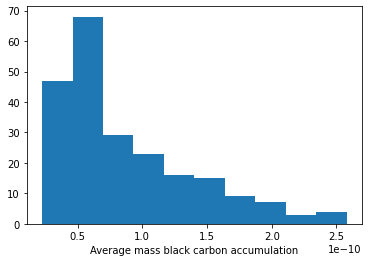

In [38]:
avg_massBCacc = []

for i in range(221):
    my_df = make_readable(evaluate_metrics(ensem_mem = i))
    avg_massBCacc.append(np.mean(my_df.AverageMassBCacc_SimulationSample))

plt.hist(avg_massBCacc)
plt.xlabel("Average mass black carbon accumulation")

In [43]:
sample = c3.NetCDFUtil.openFile("azure://aircraft-observations/mrg1_P3_20170818_R26.nc")
rBC_massConc = np.mean(sample['rBC_massConc'][:])
print(rBC_massConc)

138.9211449066856
